<a href="https://colab.research.google.com/github/cambo2018/Advanced-Dynamics/blob/main/12_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install whit-phys-util

In [ ]:
import whit_phys_util as buc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
repo = buc.local_repository("https://github.com/cambo2018/Advanced-Dynamics")

Repository exists at this location. Pulling changes from GitHub.


# a)
Eq. 12.17: $$ (\gamma_{n+1} - \gamma_n) = \frac{1}{\delta}(\gamma_n - \gamma_{n-1}) $$

Taking the limit of Eq. 12.17 as $n \rightarrow \infty$, we get
$$ \lim_{n \rightarrow \infty} (\gamma_{n+1} - \gamma_n) = \frac{1}{\delta}\lim_{n \rightarrow \infty} (\gamma_{n} - \gamma_{n-1}) = 0$$

Therefore, $\gamma_n \rightarrow \gamma_c$ as $n \rightarrow \infty$.

# b)

In [ ]:
gamma_n = [1.0663, 1.0793, 1.0821, 1.0827]
delta = 4.6692016
gamma_c = 1.0829

In [ ]:
from typing import DefaultDict
df = pd.DataFrame()
df['gamma_n'] = gamma_n
df['n'] = [1, 2, 3, 4]
df['delta^-n'] = delta**(-df['n'])

In [ ]:
df

,gamma_n,n,delta^-n
0,1.0663,1,0.214169
1,1.0793,2,0.045869
2,1.0821,3,0.009824
3,1.0827,4,0.002104


In [ ]:
fitTable, fitFunc = buc.prettyPolyFit(df['delta^-n'], df['gamma_n'])
fitTable

,slope,intercept
value,-0.077317,1.082857
uncertainty,0.000102,0.000011


In [ ]:
print(f"The slope is ({fitTable['slope']['value']:.5f} ± {fitTable['slope']['uncertainty']:.5f})")
print(f"The intercept is ({fitTable['intercept']['value']:.6f} ± {fitTable['intercept']['uncertainty']:.6f})")

The slope is (-0.07732 ± 0.00010)
The intercept is (1.082857 ± 0.000011)


In [ ]:
percent_error = abs((fitTable['intercept']['value'] - gamma_c)/gamma_c*100)
percent_error

0.003980271421450803

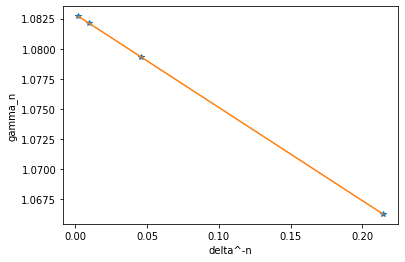

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['delta^-n'], df['gamma_n'], '*')
ax.set_xlabel('delta^-n')
ax.set_ylabel('gamma_n')
t_fit = np.linspace(min(df['delta^-n']), max(df['delta^-n']),2);
ax.plot(t_fit, fitFunc(t_fit));

In [ ]:
buc.notebook_to_pdf(repo, author="Cameron Brewer", title="12.12")